In [134]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import ttest_ind
import numpy as np
from scipy.stats.stats import pearsonr
from IPython.display import display, Markdown, Latex
plt.style.use('ggplot')
from datetime import date
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm
from seaborn_qqplot import pplot
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas

data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_91803/4142588568.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


# Update mobility variables

In [135]:
#income and age added in census folder notebook before continuing here
mob_vars = pd.read_csv(data_path + 'mobility_heat/mob_vars_final_clean_90.csv')
#relative_heat = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/heatwave/relative_heat_scores.csv')

### Add winter temperatures

In [136]:
winter = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/winter_v2.csv')

In [137]:
mob_vars = mob_vars.merge(winter[['location', 'temperature_2m_winter']])

In [138]:
mob_vars['stage']

0       1.0
1       2.0
2       1.0
3       2.0
4       1.0
       ... 
7410    1.0
7411    2.0
7412    3.0
7413    4.0
7414    5.0
Name: stage, Length: 7415, dtype: float64

In [139]:
mob_vars[mob_vars['state'] == 'British Columbia']['county'].unique()

array(['Alberni-Clayoquot', 'Bulkley-Nechako', 'Capital', 'Cariboo',
       'Central Kootenay', 'Central Okanagan', 'Columbia-Shuswap',
       'Comox Valley', 'Cowichan Valley', 'East Kootenay',
       'Fraser Valley', 'Fraser-Fort George', 'Kitimat-Stikine',
       'Kootenay Boundary', 'Greater Vancouver', 'Mount Waddington',
       'Nanaimo', 'North Okanagan', 'Okanagan-Similkameen', 'Peace River',
       'Squamish-Lillooet', 'Strathcona', 'Sunshine Coast',
       'Thompson-Nicola'], dtype=object)

### Get heat waves duration (greater or less 5 days) 

In [140]:
mob_vars[mob_vars['state'] == 'British Columbia']

,Unnamed: 0.3,Unnamed: 0.2,index,Unnamed: 0.1,Unnamed: 0,country_region_code,country_region,state,county,metro_area,...,date,Heat Wave Duration,dur_ranking,stage,NAME,over65_dec,income_dec,nonwhite_dec,popdens_dec,temperature_2m_winter
6162,6162,6162,6162,6162,6645,CA,Canada,British Columbia,Alberni-Clayoquot,NaN,...,2020-07-26,2.0,0.094401,1.0,NaN,6,2,3,7,2.451855
6163,6163,6163,6163,6163,6646,CA,Canada,British Columbia,Alberni-Clayoquot,NaN,...,2020-07-27,2.0,0.094401,2.0,NaN,6,2,3,7,2.451855
6164,6164,6164,6164,6164,6649,CA,Canada,British Columbia,Alberni-Clayoquot,NaN,...,2020-07-30,2.0,0.094401,1.0,NaN,6,2,3,7,2.451855
6165,6165,6165,6165,6165,6650,CA,Canada,British Columbia,Alberni-Clayoquot,NaN,...,2020-07-31,2.0,0.094401,2.0,NaN,6,2,3,7,2.451855
6166,6166,6166,6166,6166,6665,CA,Canada,British Columbia,Alberni-Clayoquot,NaN,...,2020-08-15,3.0,0.281732,1.0,NaN,6,2,3,7,2.451855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7410,7410,7410,7410,7410,13380,CA,Canada,British Columbia,Thompson-Nicola,NaN,...,2022-08-30,5.0,0.575697,1.0,NaN,5,6,6,6,-7.356643
7411,7411,7411,7411,7411,13381,CA,Canada,British Columbia,Thompson-Nicola,NaN,...,2022-08-31,5.0,0.575697,2.0,NaN,5,6,6,6,-7.356643
7412,7412,7412,7412,7412,13382,CA,Canada,British Columbia,Thompson-Nicola,NaN,...,2022-09-01,5.0,0.575697,3.0,NaN,5,6,6,6,-7.356643
7413,7413,7413,7413,7413,13383,CA,Canada,British Columbia,Thompson-Nicola,NaN,...,2022-09-02,5.0,0.575697,4.0,NaN,5,6,6,6,-7.356643


In [142]:
mob_vars['heatwave_dur'] = ['<5 days' if x<5 else '>=5 days' for x in mob_vars['Heat Wave Duration']]
 

In [143]:
mob_vars['heatwave_dur'].unique()


array(['<5 days', '>=5 days'], dtype=object)

In [144]:
mob_vars[mob_vars['state'] == 'British Columbia']

,Unnamed: 0.3,Unnamed: 0.2,index,Unnamed: 0.1,Unnamed: 0,country_region_code,country_region,state,county,metro_area,...,Heat Wave Duration,dur_ranking,stage,NAME,over65_dec,income_dec,nonwhite_dec,popdens_dec,temperature_2m_winter,heatwave_dur
6162,6162,6162,6162,6162,6645,CA,Canada,British Columbia,Alberni-Clayoquot,NaN,...,2.0,0.094401,1.0,NaN,6,2,3,7,2.451855,<5 days
6163,6163,6163,6163,6163,6646,CA,Canada,British Columbia,Alberni-Clayoquot,NaN,...,2.0,0.094401,2.0,NaN,6,2,3,7,2.451855,<5 days
6164,6164,6164,6164,6164,6649,CA,Canada,British Columbia,Alberni-Clayoquot,NaN,...,2.0,0.094401,1.0,NaN,6,2,3,7,2.451855,<5 days
6165,6165,6165,6165,6165,6650,CA,Canada,British Columbia,Alberni-Clayoquot,NaN,...,2.0,0.094401,2.0,NaN,6,2,3,7,2.451855,<5 days
6166,6166,6166,6166,6166,6665,CA,Canada,British Columbia,Alberni-Clayoquot,NaN,...,3.0,0.281732,1.0,NaN,6,2,3,7,2.451855,<5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7410,7410,7410,7410,7410,13380,CA,Canada,British Columbia,Thompson-Nicola,NaN,...,5.0,0.575697,1.0,NaN,5,6,6,6,-7.356643,>=5 days
7411,7411,7411,7411,7411,13381,CA,Canada,British Columbia,Thompson-Nicola,NaN,...,5.0,0.575697,2.0,NaN,5,6,6,6,-7.356643,>=5 days
7412,7412,7412,7412,7412,13382,CA,Canada,British Columbia,Thompson-Nicola,NaN,...,5.0,0.575697,3.0,NaN,5,6,6,6,-7.356643,>=5 days
7413,7413,7413,7413,7413,13383,CA,Canada,British Columbia,Thompson-Nicola,NaN,...,5.0,0.575697,4.0,NaN,5,6,6,6,-7.356643,>=5 days


In [145]:
mob_vars.groupby('state')['Heat Wave Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
British Columbia,1253.0,5.419792,2.395281,2.0,3.0,5.0,7.0,11.0
California,2677.0,5.026149,2.635291,2.0,3.0,4.0,7.0,11.0
Oregon,1665.0,4.361562,2.242018,2.0,2.0,4.0,6.0,11.0
Washington,1820.0,4.771429,2.238515,2.0,3.0,4.0,6.0,12.0


In [146]:
mob_vars.groupby('state').describe()

Unnamed: 0.3                                               \
                        count    mean         std     min      25%     50%   
state                                                                        
British Columbia       1253.0  6788.0  361.854252  6162.0  6475.00  6788.0   
California             2677.0  1338.0  772.927659     0.0   669.00  1338.0   
Oregon                 1665.0  3509.0  480.788415  2677.0  3093.00  3509.0   
Washington             1820.0  5251.5  525.533063  4342.0  4796.75  5251.5   

                                  Unnamed: 0.2          ... popdens_dec        \
                      75%     max        count    mean  ...         75%   max   
state                                                   ...                     
British Columbia  7101.00  7414.0       1253.0  6788.0  ...         8.0  10.0   
California        2007.00  2676.0       2677.0  1338.0  ...         8.0  10.0   
Oregon            3925.00  4341.0       1665.0  3509.0  ...         8.0  10.0   
Washington        5706.25  6161.0       1820.0  5251.5  ...         8.0  10.0   

                 temperature_2m_winter                                 \
                                 count      mean       std        min   
state                                                                   
British Columbia                1253.0 -4.848733  5.446734 -16.389372   
California                      2677.0  7.473613  3.446547  -3.325087   
Oregon                          1665.0  3.880143  2.862597  -1.836170   
Washington                      1820.0  2.659770  2.834810  -3.429077   

                                                           
                       25%       50%       75%        max  
state                                                      
British Columbia -8.917167 -4.445171 -1.029141   4.115940  
California        4.956636  8.569279  9.775681  14.461462  
Oregon            1.023943  4.751289  5.942653   8.775652  
Washington        0.915556  2.954577  5.497320   7.447186  

[4 rows x 360 columns]

### Get stage_frac variables

In [147]:
mob_vars['stage_frac'] = mob_vars['stage'] / mob_vars['Heat Wave Duration'] * 100


In [148]:
mob_vars['stage_frac'].describe()


count    7415.000000
mean       63.102466
std        28.409998
min         8.333333
25%        40.000000
50%        62.500000
75%       100.000000
max       100.000000
Name: stage_frac, dtype: float64

In [149]:
mob_vars.to_csv(data_path + 'mobility_heat/final_premultivariate_clean_90.csv')

In [150]:
mob_vars

,Unnamed: 0.3,Unnamed: 0.2,index,Unnamed: 0.1,Unnamed: 0,country_region_code,country_region,state,county,metro_area,...,dur_ranking,stage,NAME,over65_dec,income_dec,nonwhite_dec,popdens_dec,temperature_2m_winter,heatwave_dur,stage_frac
0,0,0,0,0,48495,US,United States,California,Alameda County,NaN,...,0.094401,1.0,"Alameda County, California",3,10,10,10,9.731907,<5 days,50.0
1,1,1,1,1,48496,US,United States,California,Alameda County,NaN,...,0.094401,2.0,"Alameda County, California",3,10,10,10,9.731907,<5 days,100.0
2,2,2,2,2,48533,US,United States,California,Alameda County,NaN,...,0.094401,1.0,"Alameda County, California",3,10,10,10,9.731907,<5 days,50.0
3,3,3,3,3,48534,US,United States,California,Alameda County,NaN,...,0.094401,2.0,"Alameda County, California",3,10,10,10,9.731907,<5 days,100.0
4,4,4,4,4,48566,US,United States,California,Alameda County,NaN,...,0.861016,1.0,"Alameda County, California",3,10,10,10,9.731907,>=5 days,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7410,7410,7410,7410,7410,13380,CA,Canada,British Columbia,Thompson-Nicola,NaN,...,0.575697,1.0,NaN,5,6,6,6,-7.356643,>=5 days,20.0
7411,7411,7411,7411,7411,13381,CA,Canada,British Columbia,Thompson-Nicola,NaN,...,0.575697,2.0,NaN,5,6,6,6,-7.356643,>=5 days,40.0
7412,7412,7412,7412,7412,13382,CA,Canada,British Columbia,Thompson-Nicola,NaN,...,0.575697,3.0,NaN,5,6,6,6,-7.356643,>=5 days,60.0
7413,7413,7413,7413,7413,13383,CA,Canada,British Columbia,Thompson-Nicola,NaN,...,0.575697,4.0,NaN,5,6,6,6,-7.356643,>=5 days,80.0


# Set up multivariate


In [151]:
mob_vars = pd.read_csv(data_path + 'mobility_heat/final_premultivariate_clean_90.csv')

In [152]:
coast_stuff = pd.read_csv(data_path + 'mobility_heat/multivariate_modelling_v25.csv')
coast_stuff.drop_duplicates('location', inplace=True)

In [153]:
mob_vars = mob_vars.merge(coast_stuff[['location', 'coast_binary']], on='location')

In [154]:
mob_vars.columns

Index(['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'index', 'Unnamed: 0.1',
       'Unnamed: 0', 'country_region_code', 'country_region', 'state',
       'county', 'metro_area', 'iso_3166_2_code', 'census_fips_code',
       'place_id', 'date_heat', 'retail_heat', 'grocery_pharmacy_heat',
       'parks_heat', 'transit_heat', 'workplaces_heat', 'residential_heat',
       'year', 'location', 'geometry', 'control_day', 'temperature_2m_heat',
       'heat_ID_x', 'date_control', 'retail_control',
       'grocery_pharmacy_control', 'parks_control', 'transit_control',
       'workplaces_control', 'residential_control', 'retail_difference',
       'grocery_pharmacy_difference', 'parks_difference', 'transit_difference',
       'workplaces_difference', 'residential_difference', 'day_of_week',
       'weekend', 'holiday', 'us_holiday_heat', 'us_holiday', 'C',
       'datetime_heat', 'temperature_2m_control', 'datetime_control',
       'temperature_2m', 'temp_diff', 'heat_ID_y', 'date',
       

In [155]:
mob_vars.groupby('location')['temperature_2m_winter'].mean().mean()

3.6709194539925085

In [156]:
mob_vars.groupby('location')['temperature_2m_winter'].mean().mean()

3.6709194539925085

In [157]:
mob_vars['parks_difference'].describe()

count    3430.000000
mean       -3.453061
std        34.199081
min      -257.000000
25%       -18.000000
50%        -6.000000
75%         7.000000
max       320.000000
Name: parks_difference, dtype: float64

<AxesSubplot:xlabel='parks_difference', ylabel='Count'>

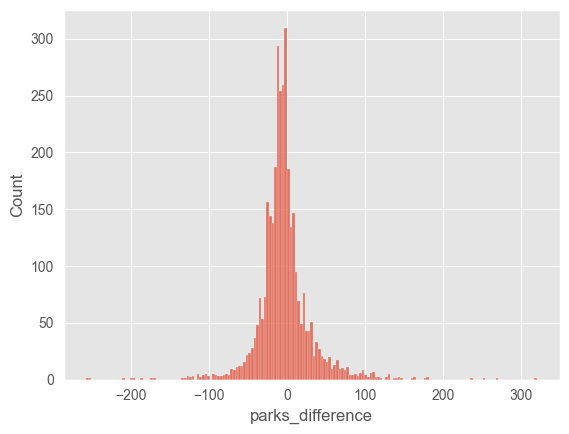

In [158]:
sns.histplot(mob_vars['parks_difference'])

In [159]:
mob_vars['temperature_2m_heat'].mean()

33.83847567682509

In [160]:
df = mob_vars.copy()

### Remove Outliers

In [161]:
df['parks_difference'].describe()

count    3430.000000
mean       -3.453061
std        34.199081
min      -257.000000
25%       -18.000000
50%        -6.000000
75%         7.000000
max       320.000000
Name: parks_difference, dtype: float64

In [162]:
df['residential_difference'].describe()

count    5955.000000
mean        0.050378
std         2.076424
min       -12.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max        14.000000
Name: residential_difference, dtype: float64

In [163]:
df['workplaces_difference'] = [np.nan if abs(x) >= df['workplaces_difference'].mean() + (3 * df['workplaces_difference'].std()) else x for x in df['workplaces_difference'] ]

df['residential_difference'] = [np.nan if abs(x) >= df['residential_difference'].mean() + (3 * df['residential_difference'].std()) else x for x in df['residential_difference'] ]

df['grocery_pharmacy_difference'] = [np.nan if abs(x) >= df['grocery_pharmacy_difference'].mean() + (3 * df['grocery_pharmacy_difference'].std()) else x for x in df['grocery_pharmacy_difference'] ]

df['parks_difference'] = [np.nan if abs(x)>= df['parks_difference'].mean() + (3 * df['parks_difference'].std()) else x for x in df['parks_difference'] ]

df['retail_difference'] = [np.nan if abs(x) >= df['retail_difference'].mean() + (3 * df['retail_difference'].std()) else x for x in df['retail_difference'] ]

df['transit_difference'] = [np.nan if abs(x) >= df['transit_difference'].mean() + (3 * df['transit_difference'].std()) else x for x in df['transit_difference'] ]

#v13
df.dropna(how='all', subset=['workplaces_difference', 'residential_difference', 'transit_difference', 'grocery_pharmacy_difference', 'parks_difference', 'retail_difference'], inplace=True)

### Center heat wave and temperature difference variables

In [164]:
len(df)

7383

In [165]:
df['heat_temp_centered'] = df['temperature_2m_heat'] - df['temperature_2m_heat'].mean()


### Get Large city Variables

In [166]:
df['large_city'] = [x if x in ['Los Angeles County', 'San Diego County', 'Santa Clara County', 'San Francisco County', 'Sacramento County', 'King County', 'Multnomah County', 'Greater Vancouver'] else 'nonmajor' for x  in df['county']]

### Get coast binary as digit

In [167]:
df['coast_binary'] = df['coast_binary'] * 1

In [168]:
df[df['coast_binary'] == 1]['location'].unique()

array(['Del Norte County, California', 'Humboldt County, California',
       'Los Angeles County, California', 'Marin County, California',
       'Mendocino County, California', 'Monterey County, California',
       'Orange County, California', 'San Diego County, California',
       'San Francisco County, California',
       'San Luis Obispo County, California',
       'San Mateo County, California', 'Santa Barbara County, California',
       'Santa Cruz County, California', 'Sonoma County, California',
       'Ventura County, California', 'Clatsop County, Oregon',
       'Coos County, Oregon', 'Curry County, Oregon',
       'Douglas County, Oregon', 'Lane County, Oregon',
       'Lincoln County, Oregon', 'Tillamook County, Oregon',
       'Clallam County, Washington', 'Grays Harbor County, Washington',
       'Island County, Washington', 'Jefferson County, Washington',
       'King County, Washington', 'Kitsap County, Washington',
       'Pacific County, Washington', 'Pierce County, W

In [169]:
df['date'] = pd.to_datetime(df['date'])

In [170]:
df['month'] = [x.month for x in df['date']]

In [171]:
df['month'].unique()

array([6, 7, 8, 9])

In [172]:
df['date_heat'] = pd.to_datetime(df['date_heat'])
df['control_day'] = pd.to_datetime(df['control_day'])

In [173]:
abs((df['date_heat'] - df['control_day'])).describe()

count                          7383
mean     10 days 14:04:55.489638358
std       5 days 08:24:29.411994515
min                 7 days 00:00:00
25%                 7 days 00:00:00
50%                 7 days 00:00:00
75%                14 days 00:00:00
max                49 days 00:00:00
dtype: object

In [174]:
df

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,index,Unnamed: 0.1,Unnamed: 0,country_region_code,country_region,state,county,...,income_dec,nonwhite_dec,popdens_dec,temperature_2m_winter,heatwave_dur,stage_frac,coast_binary,heat_temp_centered,large_city,month
0,0,0,0,0,0,48495,US,United States,California,Alameda County,...,10,10,10,9.731907,<5 days,50.0,0,0.345648,nonmajor,6
1,1,1,1,1,1,48496,US,United States,California,Alameda County,...,10,10,10,9.731907,<5 days,100.0,0,-0.033147,nonmajor,6
2,2,2,2,2,2,48533,US,United States,California,Alameda County,...,10,10,10,9.731907,<5 days,50.0,0,-0.111372,nonmajor,7
3,3,3,3,3,3,48534,US,United States,California,Alameda County,...,10,10,10,9.731907,<5 days,100.0,0,0.360352,nonmajor,7
4,4,4,4,4,4,48566,US,United States,California,Alameda County,...,10,10,10,9.731907,>=5 days,12.5,0,-0.129889,nonmajor,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7410,7410,7410,7410,7410,7410,13380,CA,Canada,British Columbia,Thompson-Nicola,...,6,6,6,-7.356643,>=5 days,20.0,0,-7.039097,nonmajor,8
7411,7411,7411,7411,7411,7411,13381,CA,Canada,British Columbia,Thompson-Nicola,...,6,6,6,-7.356643,>=5 days,40.0,0,-5.522711,nonmajor,8
7412,7412,7412,7412,7412,7412,13382,CA,Canada,British Columbia,Thompson-Nicola,...,6,6,6,-7.356643,>=5 days,60.0,0,-7.583253,nonmajor,9
7413,7413,7413,7413,7413,7413,13383,CA,Canada,British Columbia,Thompson-Nicola,...,6,6,6,-7.356643,>=5 days,80.0,0,-5.721882,nonmajor,9


In [175]:
df['state'].value_counts()

California          2656
Washington          1819
Oregon              1659
British Columbia    1249
Name: state, dtype: int64

In [176]:
df.groupby('state')['Heat Wave Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
British Columbia,1249.0,5.414732,2.396774,2.0,3.0,5.0,7.0,11.0
California,2656.0,5.027108,2.637128,2.0,3.0,4.0,7.0,11.0
Oregon,1659.0,4.356841,2.236439,2.0,2.0,4.0,6.0,11.0
Washington,1819.0,4.771853,2.239057,2.0,3.0,4.0,6.0,12.0


### Get first heat wave variable

In [177]:
df = df[['temperature_2m_heat', 'month', 'date_heat', 'control_day', 'Heat Wave Duration', 'large_city', 'date', 'location', 'heat_ID_x', 'workplaces_difference', 'residential_difference', 'grocery_pharmacy_difference', 'retail_difference', 'parks_difference', 'transit_difference', 'state', 'year', 'weekend', 'stage_frac', 'heatwave_dur', 'temp_diff', 'heat_temp_centered', 'coast_binary', 'temperature_2m_winter', 'income_dec', 'over65_dec', 'nonwhite_dec','large_city', 'popdens_dec']]

In [178]:
df['index'] = range(0, len(df))

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_91803/1307996848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['index'] = range(0, len(df))


In [179]:
df['june_hw'] = df.groupby(['heat_ID_x'])['month'].transform(lambda x: 6 in x.unique())

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_91803/2029290339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['june_hw'] = df.groupby(['heat_ID_x'])['month'].transform(lambda x: 6 in x.unique())


In [180]:
df['month'].value_counts()

8    2637
7    2548
9    1214
6     984
Name: month, dtype: int64

In [181]:
len(df.heat_ID_x.unique())

2033

In [182]:
df.rename(columns={'heat_ID_x': 'heat_ID'}, inplace=True)

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_91803/3410407454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'heat_ID_x': 'heat_ID'}, inplace=True)


In [183]:
#get earliest heat wave day of each county
early_hw = df.groupby(['year', 'location'])['date'].apply(lambda x: x.min()).reset_index()
df = df.merge(early_hw, on=['year', 'location'])

In [184]:
df['annual_min'] = df['date_x'] == df['date_y']

In [185]:
df['first_annual_hw'] = df.groupby('heat_ID')['annual_min'].transform(lambda x: True in x.unique())

In [186]:
df.drop_duplicates(['heat_ID', 'first_annual_hw'])['first_annual_hw'].value_counts()

False    1583
True      450
Name: first_annual_hw, dtype: int64

In [187]:
df['june_hw'] = df['june_hw'] * 1
df['first_annual_hw'] = df['first_annual_hw'] * 1

In [188]:
df['hw_dur_>=_5'] = [0 if x=='<5 days' else 1 for x in df['heatwave_dur']]

In [189]:
df.groupby('state')['popdens_dec'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
British Columbia,1249.0,6.038431,2.610100,2.0,4.0,6.0,8.0,10.0
California,2656.0,5.610693,2.730828,1.0,3.0,6.0,8.0,10.0
Oregon,1659.0,5.776974,2.764094,1.0,3.0,6.0,8.0,10.0
Washington,1819.0,5.912040,2.676953,1.0,4.0,6.0,8.0,10.0


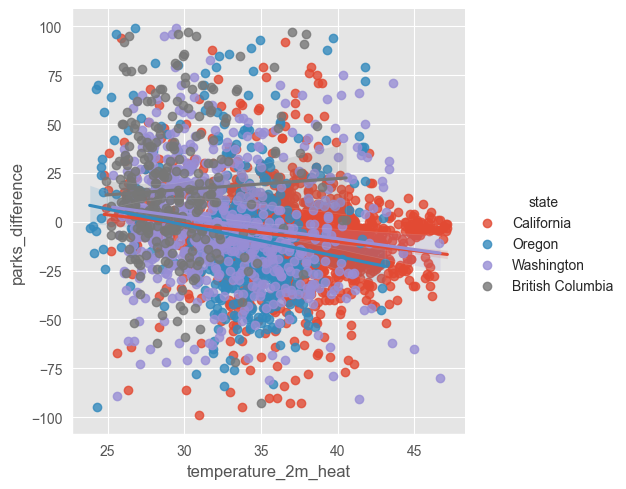

In [190]:
sns.lmplot(df, x='temperature_2m_heat', y='parks_difference', hue='state')

In [198]:
df.drop_duplicates('heat_ID').groupby('state')['Heat Wave Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
British Columbia,298.0,4.265101,2.205027,2.0,2.0,4.0,6.0,11.0
California,721.0,3.812760,2.168500,2.0,2.0,3.0,5.0,11.0
Oregon,518.0,3.393822,1.841736,2.0,2.0,3.0,4.0,11.0
Washington,496.0,3.822581,1.926103,2.0,2.0,3.0,5.0,12.0


In [199]:
df['Heat Wave Duration']

0       2.0
1       2.0
2       2.0
3       2.0
4       8.0
       ... 
7378    5.0
7379    5.0
7380    5.0
7381    5.0
7382    5.0
Name: Heat Wave Duration, Length: 7383, dtype: float64

In [200]:
df1 = df.copy()

In [201]:
np.corrcoef(df1['income_dec'], df['popdens_dec'])

array([[1.        , 0.59248318],
       [0.59248318, 1.        ]])

In [202]:
slic= df.drop_duplicates('location')

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_91803/3535925902.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['parks_difference'])


<AxesSubplot:xlabel='parks_difference', ylabel='Density'>

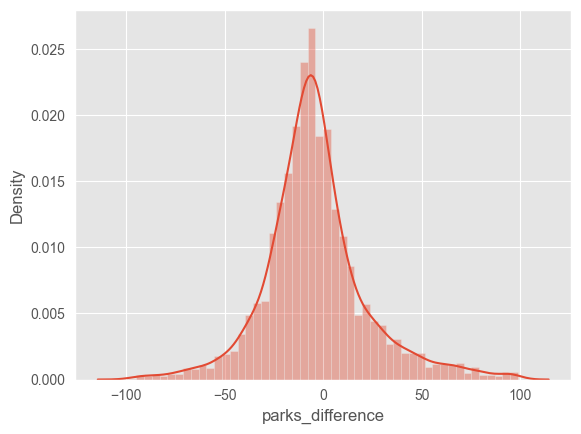

In [196]:
sns.distplot(df['parks_difference'])

In [ ]:
  2.05056    
 -0.08252    
 10.53585    
 -2.15089    
  1.12579    
 53.07185    
 -1.77250    
 -2.54478    
  7.00569    
 20.52265    
 -2.04195    
 -0.39135    
 13.87581    
 10.94025    
 26.55334    
 -7.47029    
 -7.73821    
  3.99106    
 43.16127    
 29.31764    
454.13135    

In [203]:
df.groupby('state')['location'].describe()

,count,unique,top,freq
state,,,,
British Columbia,1249,24,"East Kootenay, British Columbia",62
California,2656,56,"Tulare County, California",65
Oregon,1659,34,"Deschutes County, Oregon",63
Washington,1819,36,"Benton County, Washington",67


In [204]:
df['temperature_2m_heat'].mean()

33.835304030141245

In [205]:
df.drop_duplicates('heat_ID').groupby('state')['Heat Wave Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
British Columbia,298.0,4.265101,2.205027,2.0,2.0,4.0,6.0,11.0
California,721.0,3.812760,2.168500,2.0,2.0,3.0,5.0,11.0
Oregon,518.0,3.393822,1.841736,2.0,2.0,3.0,4.0,11.0
Washington,496.0,3.822581,1.926103,2.0,2.0,3.0,5.0,12.0


In [206]:
df.drop_duplicates('heat_ID').groupby('state')['Heat Wave Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
British Columbia,298.0,4.265101,2.205027,2.0,2.0,4.0,6.0,11.0
California,721.0,3.812760,2.168500,2.0,2.0,3.0,5.0,11.0
Oregon,518.0,3.393822,1.841736,2.0,2.0,3.0,4.0,11.0
Washington,496.0,3.822581,1.926103,2.0,2.0,3.0,5.0,12.0


In [207]:
df.groupby('state')['temperature_2m_heat'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
British Columbia,1249.0,27.950529,3.316384,19.266854,25.864297,27.646685,29.746177,40.556122
California,2656.0,36.803935,4.222549,24.768563,34.043009,36.818277,39.947818,47.154137
Oregon,1659.0,33.800141,3.049116,23.828261,32.407309,33.875316,35.520793,44.416451
Washington,1819.0,33.573476,4.671580,20.540545,30.084286,33.685631,37.084741,46.928690


In [208]:
df['temperature_2m_heat'].mean()

33.835304030141245

In [209]:
df.to_csv(data_path + 'mobility_heat/final_multivariate_clean_90.csv')

In [75]:
len(df.location.unique())

150

In [308]:
df = pd.read_csv(data_path + 'mobility_heat/final_multivariate_3_SD_90_v6.csv')

In [309]:
df['date_heat'] = pd.to_datetime(df['date_heat'])
df['control_day'] = pd.to_datetime(df['control_day'])



In [310]:
df['date_diff'] = df['date_heat'] - df['control_day']

In [311]:
df['date_diff'] = [abs(x.days) for x in df['date_diff']]

In [312]:
df['date_diff'].describe()

count    7382.000000
mean       10.586291
std         5.350555
min         7.000000
25%         7.000000
50%         7.000000
75%        14.000000
max        49.000000
Name: date_diff, dtype: float64

In [87]:
df.groupby('state')['location'].describe()

,count,unique,top,freq
state,,,,
British Columbia,1259,24,"Okanagan-Similkameen, British Columbia",72
California,2740,56,"Tehama County, California",67
Oregon,1676,34,"Malheur County, Oregon",74
Washington,1817,36,"Benton County, Washington",66


In [89]:
df.groupby('state')['temperature_2m_heat'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
British Columbia,1259.0,32.683278,3.185101,26.922891,30.273332,32.671548,34.333536,44.067896
California,2740.0,41.168649,3.821602,26.664972,38.767957,41.474260,43.619760,51.490472
Oregon,1676.0,37.052028,2.953663,29.019296,35.261190,36.789323,38.821046,48.115305
Washington,1817.0,36.638593,4.601117,20.956140,33.507318,36.784219,39.950845,48.115305


In [67]:
len(df['location'].unique())

150

In [68]:
x = df.drop_duplicates('location')

In [69]:
df

,Unnamed: 0,temperature_2m_heat,month,date_heat,control_day,Heat Wave Duration,large_city,date_x,location,heat_ID,...,nonwhite_dec,large_city.1,popdens_dec,index,june_hw,date_y,annual_min,first_annual_hw,hw_dur_>=_5,date_diff
0,0,37.225656,6,2020-06-03,2020-05-20,3.0,nonmajor,2020-06-03,"Alameda County, California",f7d0b0dc-2b0e-4bd9-84fb-5e748fcfa547,...,10,nonmajor,10,0,1,2020-06-03,True,1,0,14
1,1,37.168100,6,2020-06-04,2020-05-21,3.0,nonmajor,2020-06-04,"Alameda County, California",f7d0b0dc-2b0e-4bd9-84fb-5e748fcfa547,...,10,nonmajor,10,1,1,2020-06-03,False,1,0,14
2,2,35.931024,6,2020-06-05,2020-05-29,3.0,nonmajor,2020-06-05,"Alameda County, California",f7d0b0dc-2b0e-4bd9-84fb-5e748fcfa547,...,10,nonmajor,10,2,1,2020-06-03,False,1,0,7
3,3,36.277505,7,2020-07-11,2020-07-04,2.0,nonmajor,2020-07-11,"Alameda County, California",29b5e08b-f1f7-4ade-8771-b216c7dc9439,...,10,nonmajor,10,3,0,2020-06-03,False,0,0,7
4,4,36.687509,7,2020-07-12,2020-07-05,2.0,nonmajor,2020-07-12,"Alameda County, California",29b5e08b-f1f7-4ade-8771-b216c7dc9439,...,10,nonmajor,10,4,0,2020-06-03,False,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7487,7487,32.372690,8,2022-08-13,2022-08-06,5.0,nonmajor,2022-08-13,"Thompson-Nicola, British Columbia",98958956-6892-4f96-b5e4-1dbd0bfb0097,...,6,nonmajor,6,7487,0,2022-07-21,False,0,1,7
7488,7488,32.345209,8,2022-08-30,2022-09-06,2.0,nonmajor,2022-08-30,"Thompson-Nicola, British Columbia",b0843002-2236-4f1c-9734-32237c1d3a4f,...,6,nonmajor,6,7488,0,2022-07-21,False,0,0,7
7489,7489,34.352411,8,2022-08-31,2022-09-07,2.0,nonmajor,2022-08-31,"Thompson-Nicola, British Columbia",b0843002-2236-4f1c-9734-32237c1d3a4f,...,6,nonmajor,6,7489,0,2022-07-21,False,0,0,7
7490,7490,34.571527,9,2022-09-02,2022-09-09,2.0,nonmajor,2022-09-02,"Thompson-Nicola, British Columbia",62690fc9-726c-40b5-9e97-b049e387a002,...,6,nonmajor,6,7490,0,2022-07-21,False,0,0,7


In [70]:
x[x['income_dec'] == 10]

,Unnamed: 0,temperature_2m_heat,month,date_heat,control_day,Heat Wave Duration,large_city,date_x,location,heat_ID,...,nonwhite_dec,large_city.1,popdens_dec,index,june_hw,date_y,annual_min,first_annual_hw,hw_dur_>=_5,date_diff
0,0,37.225656,6,2020-06-03,2020-05-20,3.0,nonmajor,2020-06-03,"Alameda County, California",f7d0b0dc-2b0e-4bd9-84fb-5e748fcfa547,...,10,nonmajor,10,0,1,2020-06-03,True,1,0,14
244,244,37.984781,6,2020-06-03,2020-05-20,3.0,nonmajor,2020-06-03,"Contra Costa County, California",3da8611d-e47d-4090-b4a5-37300246f7f8,...,9,nonmajor,10,244,1,2020-06-03,True,1,0,14
952,952,31.983728,7,2020-07-11,2020-06-27,3.0,nonmajor,2020-07-11,"Marin County, California",64eb38ac-e334-4f21-baef-17203e65baee,...,4,nonmajor,8,952,0,2020-07-11,True,1,0,14
1751,1751,33.083551,8,2020-08-14,2020-08-07,8.0,San Francisco County,2020-08-14,"San Francisco County, California",6c346b2a-93ff-498a-8ac5-16f33f69351b,...,10,San Francisco County,10,1751,0,2020-08-14,True,1,1,7
1889,1889,28.821207,8,2020-08-13,2020-08-06,7.0,nonmajor,2020-08-13,"San Mateo County, California",a654b838-71f4-447b-9fa1-a1c52cf8fa7e,...,10,nonmajor,10,1889,0,2020-08-13,True,1,1,7
1961,1961,37.538416,7,2020-07-11,2020-07-04,2.0,Santa Clara County,2020-07-11,"Santa Clara County, California",e34f51fc-898d-4042-a6d0-73c4ec63cc3e,...,10,Santa Clara County,9,1961,0,2020-07-11,True,1,0,7
2845,2845,37.721918,7,2020-07-26,2020-07-12,3.0,nonmajor,2020-07-26,"Clackamas County, Oregon",be3c5594-612d-435f-9885-4db1bd287bd5,...,8,nonmajor,10,2845,0,2020-07-26,True,1,0,14
3316,3316,35.261575,7,2020-07-20,2020-07-13,2.0,nonmajor,2020-07-20,"Hood River County, Oregon",202c418d-3116-4d8e-a334-e561be929c1c,...,8,nonmajor,6,3316,0,2020-07-20,True,1,0,7
3958,3958,37.118402,7,2020-07-26,2020-07-12,3.0,Multnomah County,2020-07-26,"Multnomah County, Oregon",56c8f641-9bff-4522-b41c-b1ddce9df57d,...,10,Multnomah County,10,3958,0,2020-07-26,True,1,0,14
4323,4323,37.376215,7,2020-07-26,2020-07-12,3.0,nonmajor,2020-07-26,"Washington County, Oregon",8b006344-ad5e-47aa-bb97-92e93ddfcd11,...,10,nonmajor,10,4323,0,2020-07-26,True,1,0,14


In [71]:
df['date_diff'].describe()

count    7492.000000
mean       10.593433
std         5.443287
min         7.000000
25%         7.000000
50%         7.000000
75%        14.000000
max        49.000000
Name: date_diff, dtype: float64

In [72]:
df.groupby('state')['temperature_2m_heat'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
British Columbia,1259.0,32.683278,3.185101,26.922891,30.273332,32.671548,34.333536,44.067896
California,2740.0,41.168649,3.821602,26.664972,38.767957,41.474260,43.619760,51.490472
Oregon,1676.0,37.052028,2.953663,29.019296,35.261190,36.789323,38.821046,48.115305
Washington,1817.0,36.638593,4.601117,20.956140,33.507318,36.784219,39.950845,48.115305


In [90]:
df[['residential_difference', 'workplaces_difference', 'transit_difference', 'grocery_pharmacy_difference', 'retail_difference', 'parks_difference']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
residential_difference,5948.0,-0.029926,1.676286,-6.0,-1.0,0.0,1.0,6.0
workplaces_difference,7121.0,-0.581660,4.057431,-25.0,-2.0,0.0,1.0,24.0
transit_difference,4130.0,-0.789346,8.107756,-31.0,-5.0,-1.0,3.0,31.0
grocery_pharmacy_difference,5473.0,0.849443,6.056899,-24.0,-2.0,1.0,4.0,24.0
retail_difference,6377.0,0.596048,6.524823,-25.0,-3.0,0.0,3.0,25.0
parks_difference,3384.0,-4.574468,24.966458,-94.0,-17.0,-6.0,6.0,94.0


In [91]:
df

,Unnamed: 0,temperature_2m_heat,month,date_heat,control_day,Heat Wave Duration,large_city,date_x,location,heat_ID,...,nonwhite_dec,large_city.1,popdens_dec,index,june_hw,date_y,annual_min,first_annual_hw,hw_dur_>=_5,date_diff
0,0,37.225656,6,2020-06-03,2020-05-20,3.0,nonmajor,2020-06-03,"Alameda County, California",f7d0b0dc-2b0e-4bd9-84fb-5e748fcfa547,...,10,nonmajor,10,0,1,2020-06-03,True,1,0,14
1,1,37.168100,6,2020-06-04,2020-05-21,3.0,nonmajor,2020-06-04,"Alameda County, California",f7d0b0dc-2b0e-4bd9-84fb-5e748fcfa547,...,10,nonmajor,10,1,1,2020-06-03,False,1,0,14
2,2,35.931024,6,2020-06-05,2020-05-29,3.0,nonmajor,2020-06-05,"Alameda County, California",f7d0b0dc-2b0e-4bd9-84fb-5e748fcfa547,...,10,nonmajor,10,2,1,2020-06-03,False,1,0,7
3,3,36.277505,7,2020-07-11,2020-07-04,2.0,nonmajor,2020-07-11,"Alameda County, California",29b5e08b-f1f7-4ade-8771-b216c7dc9439,...,10,nonmajor,10,3,0,2020-06-03,False,0,0,7
4,4,36.687509,7,2020-07-12,2020-07-05,2.0,nonmajor,2020-07-12,"Alameda County, California",29b5e08b-f1f7-4ade-8771-b216c7dc9439,...,10,nonmajor,10,4,0,2020-06-03,False,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7487,7487,32.372690,8,2022-08-13,2022-08-06,5.0,nonmajor,2022-08-13,"Thompson-Nicola, British Columbia",98958956-6892-4f96-b5e4-1dbd0bfb0097,...,6,nonmajor,6,7487,0,2022-07-21,False,0,1,7
7488,7488,32.345209,8,2022-08-30,2022-09-06,2.0,nonmajor,2022-08-30,"Thompson-Nicola, British Columbia",b0843002-2236-4f1c-9734-32237c1d3a4f,...,6,nonmajor,6,7488,0,2022-07-21,False,0,0,7
7489,7489,34.352411,8,2022-08-31,2022-09-07,2.0,nonmajor,2022-08-31,"Thompson-Nicola, British Columbia",b0843002-2236-4f1c-9734-32237c1d3a4f,...,6,nonmajor,6,7489,0,2022-07-21,False,0,0,7
7490,7490,34.571527,9,2022-09-02,2022-09-09,2.0,nonmajor,2022-09-02,"Thompson-Nicola, British Columbia",62690fc9-726c-40b5-9e97-b049e387a002,...,6,nonmajor,6,7490,0,2022-07-21,False,0,0,7


In [1031]:
df.to_csv(data_path + 'mobility_heat/date_heat_v2.csv')

In [1032]:
df['date_diff']

0       14
1       14
2        7
3        7
4        7
        ..
7523     7
7524     7
7525     7
7526     7
7527     7
Name: date_diff, Length: 7528, dtype: int64

In [841]:
df['C']

KeyError: 'C'

In [842]:
df[['temperature_2m_heat', 'temp_diff', 'stage_frac', 'weekend']].describe()

,temperature_2m_heat,temp_diff,stage_frac,weekend
count,7545.000000,7545.000000,7531.000000,7545.000000
mean,37.730114,8.004432,63.278139,0.269980
std,4.799441,3.900937,28.394556,0.443979
min,20.956140,1.327606,8.333333,0.000000
25%,34.468912,5.109711,40.000000,0.000000
50%,37.749765,7.372284,62.500000,0.000000
75%,41.209787,10.216812,100.000000,1.000000
max,51.490472,25.910660,100.000000,1.000000


In [843]:
df['2021'] = [1 if x == 2021 else 0 for x in df['year'] ]

In [844]:
df['2022'] = [1 if x == 2022 else 0 for x in df['year'] ]

In [845]:
df['year'].value_counts()

2021    2985
2022    2887
2020    1673
Name: year, dtype: int64

In [846]:
df['heatwave_dur_dummy'] = [1 if x == '>=5 days' else 0 for x in df['heatwave_dur'] ]

In [847]:
df.columns

Index(['Unnamed: 0', 'temperature_2m_heat', 'month', 'date_heat',
       'control_day', 'large_city', 'date_x', 'location', 'heat_ID',
       'workplaces_difference', 'residential_difference',
       'grocery_pharmacy_difference', 'retail_difference', 'parks_difference',
       'transit_difference', 'state', 'year', 'weekend', 'stage_frac',
       'heatwave_dur', 'temp_diff', 'heat_temp_centered', 'coast_binary',
       'temperature_2m_winter', 'income_dec', 'over65_dec', 'nonwhite_dec',
       'large_city.1', 'popdens_dec', 'index', 'june_hw', 'date_y',
       'annual_min', 'first_annual_hw', 'hw_dur_>=_5', 'date_diff', '2021',
       '2022', 'heatwave_dur_dummy'],
      dtype='object')

In [848]:
df.drop_duplicates('heat_ID')[['heatwave_dur_dummy', '2021', '2022', 'june_hw']].describe()

,heatwave_dur_dummy,2021,2022,june_hw
count,2087.000000,2087.000000,2087.000000,2087.000000
mean,0.266411,0.369909,0.377575,0.168663
std,0.442188,0.482895,0.484897,0.374544
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [850]:
df.drop_duplicates('location')[['coast_binary', 'popdens_dec', 'income_dec', 'nonwhite_dec', 'over65_dec', 'temperature_2m_winter']].describe()

,coast_binary,popdens_dec,income_dec,nonwhite_dec,over65_dec,temperature_2m_winter
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.300000,5.773333,5.606667,5.573333,5.326667,3.670919
std,0.459793,2.800160,2.914662,2.938627,2.817721,5.495883
min,0.000000,1.000000,1.000000,1.000000,1.000000,-16.389372
25%,0.000000,3.000000,3.000000,3.000000,3.000000,0.942652
50%,0.000000,6.000000,6.000000,6.000000,5.000000,4.453752
75%,1.000000,8.000000,8.000000,8.000000,8.000000,7.436603
max,1.000000,10.000000,10.000000,10.000000,10.000000,14.461462


In [477]:
abs(df['date_heat'] - df['control_day'])

0      14 days
1      14 days
2       7 days
3       7 days
4       7 days
         ...  
7442    7 days
7443    7 days
7444    7 days
7445    7 days
7446    7 days
Length: 7447, dtype: timedelta64[ns]

In [267]:
#mob_vars.to_csv(data_path + 'mobility_heat/mobility_heat_w_vars_v7.csv')

## Set up grocery_pharmacy

In [229]:
mob_vars = pd.read_csv(data_path + 'mobility_heat/mobility_heat_w_vars_v10.csv')

In [230]:
mob_vars['grocery_sign'] = [1 if x>0 else 0 for x in mob_vars['grocery_pharmacy_difference']]

In [231]:
mob_vars.groupby('state')['temperature_2m_heat'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
British Columbia,1036.0,33.156163,3.219289,27.638849,30.758752,32.989549,34.784982,44.067896
California,2284.0,41.527524,3.743455,27.253336,39.217798,41.820161,43.913320,51.490472
Oregon,1396.0,37.424086,2.910678,29.528482,35.570734,37.067972,39.146795,48.115305
Washington,1498.0,37.097276,4.567677,21.027460,33.828680,37.269250,40.519643,48.115305


In [232]:
mob_vars['temperature_2m_heat'].mean()

38.14200098328091

In [233]:
df = mob_vars.dropna(subset='grocery_pharmacy_difference')
df['remove'] = [True if abs(x) >= df['grocery_pharmacy_difference'].mean() + (2 * df['grocery_pharmacy_difference'].std()) else False for x in df['grocery_pharmacy_difference'] ]
df = df[df['remove'] == False]

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_67835/2427181531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['remove'] = [True if abs(x) >= df['grocery_pharmacy_difference'].mean() + (2 * df['grocery_pharmacy_difference'].std()) else False for x in df['grocery_pharmacy_difference'] ]


In [234]:
df['heat_temp_centered'] = df['temperature_2m_heat'] - df['temperature_2m_heat'].mean()
#df['temp_diff_'] = df['temp_diff'] - df['temp_diff'].mean()

In [235]:
df['large_city'] = [x if x in ['Los Angeles County', 'San Diego County', 'Santa Clara County', 'San Francisco County', 'Sacramento County', 'King County', 'Multnomah County', 'Greater Vancouver'] else 'nonmajor' for x  in df['county']]

<AxesSubplot:xlabel='income_dec', ylabel='residential_difference'>

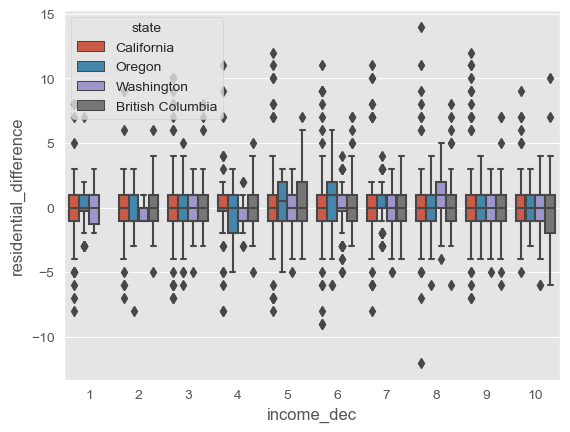

In [236]:
sns.boxplot(data=df, x='income_dec', y='residential_difference', hue='state')

In [237]:
df = df.dropna(subset=['workplaces_difference', 'residential_difference', 'grocery_pharmacy_difference', 'retail_difference', 'parks_difference'])

In [238]:
df.columns

Index(['Unnamed: 0.8', 'Unnamed: 0.7', 'Unnamed: 0.6', 'Unnamed: 0.5',
       'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'index', 'Unnamed: 0.1',
       'Unnamed: 0', 'country_region_code', 'country_region', 'state',
       'county', 'metro_area', 'iso_3166_2_code', 'census_fips_code',
       'place_id', 'date_heat', 'retail_heat', 'grocery_pharmacy_heat',
       'parks_heat', 'transit_heat', 'workplaces_heat', 'residential_heat',
       'year', 'location', 'geometry', 'control_day', 'temperature_2m_heat',
       'date_control', 'retail_control', 'grocery_pharmacy_control',
       'parks_control', 'transit_control', 'workplaces_control',
       'residential_control', 'retail_difference',
       'grocery_pharmacy_difference', 'parks_difference', 'transit_difference',
       'workplaces_difference', 'residential_difference', 'day_of_week',
       'weekend', 'datetime_x', 'temperature_2m_control', 'temp_diff',
       'heat_ID', 'date', 'Heat Wave Duration', 'dur_ranking', 'stage',
  

In [239]:
df = df[['date', 'temp_zscore', 'temp_diff_z', 'location', 'heat_ID', 'workplaces_difference', 'residential_difference', 'grocery_pharmacy_difference', 'retail_difference', 'parks_difference', 'state', 'year', 'weekend', 'stage_frac', 'heatwave_dur', 'temp_diff', 'heat_temp_centered', 'coast_binary', 'temperature_2m_winter', 'income_dec', 'over65_dec', 'large_city']]

In [240]:
df['coast_binary'] = df['coast_binary'] * 1

In [241]:
df = df.dropna(subset= ['workplaces_difference', 'residential_difference', 'grocery_pharmacy_difference', 'retail_difference', 'parks_difference', 'heat_temp_centered'])

In [242]:
df['index'] = range(0, len(df))

In [243]:
df.sort_values(by=['date', 'heat_ID', 'location'])

,date,temp_zscore,temp_diff_z,location,heat_ID,workplaces_difference,residential_difference,grocery_pharmacy_difference,retail_difference,parks_difference,...,stage_frac,heatwave_dur,temp_diff,heat_temp_centered,coast_binary,temperature_2m_winter,income_dec,over65_dec,large_city,index
209,2020-06-03,-0.447784,1.569349,"Contra Costa County, California",ab04ebba-7b6b-42ee-aec2-0d9c5d51e8f0,3.0,-1.0,3.0,0.0,-18.0,...,33.333333,<5 days,13.521606,-0.410530,0,6.805415,10,6,nonmajor,82
1487,2020-06-03,-0.826976,2.068474,"San Joaquin County, California",bf1c4609-61e3-42a8-b48d-4eadbf2b5485,2.0,-1.0,3.0,6.0,-7.0,...,33.333333,<5 days,14.283325,1.333610,0,6.834233,6,2,nonmajor,941
0,2020-06-03,-0.917689,1.853876,"Alameda County, California",d7b448e7-084c-4bfa-a5dc-2c2f7805665b,2.0,-1.0,1.0,-1.0,-6.0,...,50.000000,<5 days,13.428375,-1.169655,0,6.314208,10,3,nonmajor,0
904,2020-06-04,-1.075688,1.732724,"Merced County, California",686f32e9-0822-471a-8a15-ab9780f2b39c,2.0,-1.0,6.0,8.0,32.0,...,50.000000,<5 days,11.867493,3.961250,0,6.402945,3,1,nonmajor,521
210,2020-06-04,-0.780324,0.161455,"Contra Costa County, California",ab04ebba-7b6b-42ee-aec2-0d9c5d51e8f0,3.0,-1.0,2.0,3.0,-8.0,...,66.666667,<5 days,9.127487,-0.855065,0,6.805415,10,6,nonmajor,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5657,2022-09-11,-1.337604,-0.432095,"Fraser Valley, British Columbia",e112f778-ab0b-410d-b579-c43deb418d08,6.0,3.0,6.0,-6.0,-93.0,...,100.000000,<5 days,9.395172,-7.256447,0,-5.998179,8,4,nonmajor,2592
4289,2022-09-11,-1.709471,-0.567509,"King County, Washington",e7eb486d-6e4f-4fdd-8922-59b83736543d,5.0,3.0,1.0,-3.0,-18.0,...,100.000000,<5 days,7.110580,-6.955666,1,-0.856287,10,1,King County,2119
2839,2022-09-11,-1.565070,-0.712274,"Jackson County, Oregon",ec1ffcfa-a19d-4867-bf59-169948a7babf,3.0,1.0,-5.0,-8.0,-25.0,...,100.000000,>5 days,4.759018,-2.330666,0,-0.920590,6,6,nonmajor,1658
3142,2022-09-11,-0.865890,-0.617108,"Linn County, Oregon",f3c65960-e30b-4ffb-8b93-dc0e251e1472,3.0,2.0,-10.0,-9.0,-76.0,...,100.000000,<5 days,6.904358,-2.834572,0,-0.242498,8,4,nonmajor,1787


In [223]:
df.to_csv(data_path + 'mobility_heat/multivariate_test_v3.csv')

## Set up Parks

In [190]:
mob_vars = pd.read_csv(data_path + 'mobility_heat/mobility_heat_w_vars_v10.csv')

In [191]:
mob_vars['parks_sign'] = [1 if x>0 else 0 for x in mob_vars['parks_difference']]

In [192]:
df = mob_vars.dropna(subset='parks_difference')
#df['remove'] = [True if abs(x) >= df['parks_difference'].mean() + (2 * df['parks_difference'].std()) else False for x in df['parks_difference'] ]
#df = df[df['remove'] == False]

In [193]:
df['heat_temp_centered'] = df['temperature_2m_heat'] - df['temperature_2m_heat'].mean()
#df['temp_diff_'] = df['temp_diff'] - df['temp_diff'].mean()

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_38453/892183947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['heat_temp_centered'] = df['temperature_2m_heat'] - df['temperature_2m_heat'].mean()


In [194]:
df['large_city'] = [x if x in ['Los Angeles County', 'San Diego County', 'Santa Clara County', 'San Francisco County', 'Sacramento County', 'King County', 'Multnomah County', 'Greater Vancouver'] else 'nonmajor' for x  in df['county']]

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_38453/1973588818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['large_city'] = [x if x in ['Los Angeles County', 'San Diego County', 'Santa Clara County', 'San Francisco County', 'Sacramento County', 'King County', 'Multnomah County', 'Greater Vancouver'] else 'nonmajor' for x  in df['county']]


In [195]:
df = df[df['state'] == 'Washington']

In [196]:
model1 = np.poly1d(np.polyfit(x=df['temperature_2m_heat'], y=df['parks_difference'], deg=2))

In [197]:
polyline = np.linspace(df['temperature_2m_heat'].min(), df['temperature_2m_heat'].max(), len(df['temperature_2m_heat']))

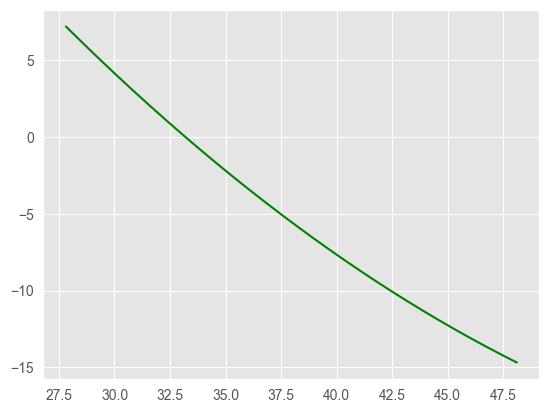

In [198]:
plt.plot(polyline, model1(polyline), color='green')

In [181]:
df['abs_parks'] = abs(df['parks_difference'])
df['abs_grocery_pharmacy'] = abs(df['grocery_pharmacy_difference'])
df['abs_retail'] = abs(df['retail_difference'])
df['abs_retail'] = abs(df['retail_difference'])
df['abs_retail'] = abs(df['retail_difference'])

In [94]:
df['abs_county_parks_control'] = abs(df['county_parks_control'])

KeyError: 'county_parks_control'

In [882]:
df['parks_difference'].mean()

-5.706661759293338

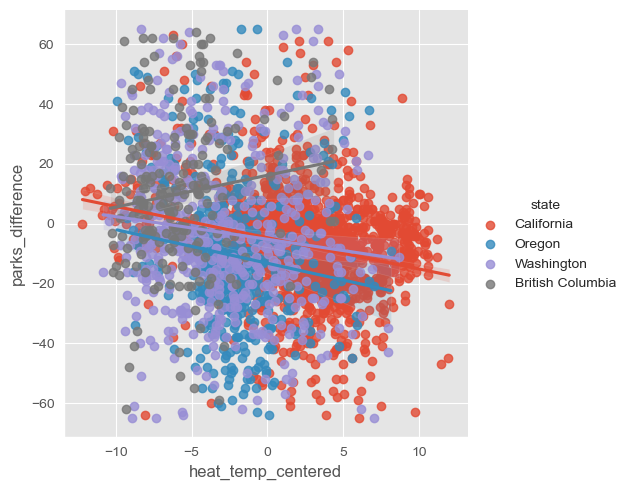

In [883]:
sns.lmplot(data=df, x='heat_temp_centered', y='parks_difference', hue='state')

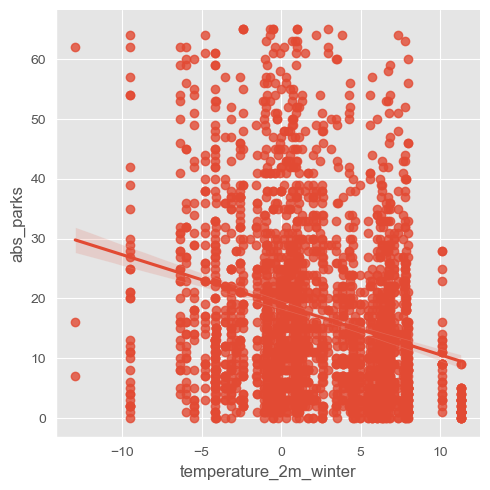

In [884]:
sns.lmplot(data=df, x='temperature_2m_winter', y='abs_parks')

In [885]:
#sns.lmplot(data=df, x='county_avg_countrol', y='workplaces_difference', hue='workplaces_sign')
#df.groupby('state')['temperature_2m_winter'].describe()

In [886]:
df['avg_county_control'] = df.groupby('location')['temperature_2m_control'].transform(lambda x: x.mean())


In [887]:
df['winter_diff'] = df['avg_county_control'] - df['temperature_2m_winter']


In [888]:
df['winter_score'] = df['temperature_2m_winter'].rank() / len(df['winter_score'])


KeyError: 'winter_score'

In [ ]:
df['transformed_diff'] = df['parks_difference']


In [889]:
df['asdf'] = abs(df['transformed_diff'])


KeyError: 'transformed_diff'

In [890]:
sns.lmplot(data=df, x='temperature_2m_winter', y='asdf')


KeyError: "['asdf'] not in index"

In [891]:
df['index'] = range(len(df))

In [892]:
df['index']

0          0
1          1
2          2
3          3
4          4
        ... 
6209    2712
6210    2713
6211    2714
6212    2715
6213    2716
Name: index, Length: 2717, dtype: int64

In [893]:
df

,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,index,Unnamed: 0.1,Unnamed: 0,...,avg_county_control,winter_diff,parks_sign,remove,heat_temp_centered,large_city,abs_parks,abs_grocery_pharmacy,abs_retail,abs_county_parks_control
0,0,0,0,0,0,0,0,0,0,48495,...,30.590512,24.276304,0,False,-2.214480,nonmajor,6.0,1.0,1.0,19.153846
1,1,1,1,1,1,1,1,1,1,48496,...,30.590512,24.276304,0,False,-2.272036,nonmajor,3.0,0.0,1.0,19.153846
2,2,2,2,2,2,2,2,2,2,48533,...,30.590512,24.276304,1,False,-3.162631,nonmajor,8.0,7.0,14.0,19.153846
3,3,3,3,3,3,3,3,3,3,48534,...,30.590512,24.276304,1,False,-2.752627,nonmajor,12.0,8.0,4.0,19.153846
4,4,4,4,4,4,4,4,4,4,48567,...,30.590512,24.276304,0,False,0.479215,nonmajor,10.0,1.0,0.0,19.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6209,6293,6291,6293,1047,6293,6293,6293,2712,6291,13361,...,24.980091,34.471035,1,False,-6.556674,nonmajor,5.0,6.0,6.0,156.800000
6210,6294,6292,6294,1048,6294,6294,6294,2713,6292,13368,...,24.980091,34.471035,1,False,-4.226123,nonmajor,54.0,1.0,1.0,156.800000
6211,6295,6293,6295,1049,6295,6295,6295,2714,6293,13369,...,24.980091,34.471035,0,False,-5.534121,nonmajor,2.0,4.0,0.0,156.800000
6212,6296,6294,6296,1050,6296,6296,6296,2715,6294,13383,...,24.980091,34.471035,1,False,-4.868609,nonmajor,2.0,1.0,3.0,156.800000


In [894]:
df.to_csv(data_path + 'mobility_heat/mobility_heat_w_vars_parks_orig.csv')

## Set up Retail

In [847]:
mob_vars = pd.read_csv(data_path + 'mobility_heat/mobility_heat_w_vars_v10.csv')

In [848]:
mob_vars['retail_sign'] = [1 if x>0 else 0 for x in mob_vars['retail_difference']]

In [849]:
df = mob_vars.dropna(subset='retail_difference')
df['remove'] = [True if abs(x) >= df['retail_difference'].mean() + (2 * df['retail_difference'].std()) else False for x in df['retail_difference'] ]
df = df[df['remove'] == False]

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_67894/194303145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['remove'] = [True if abs(x) >= df['retail_difference'].mean() + (2 * df['retail_difference'].std()) else False for x in df['retail_difference'] ]


In [850]:
df['heat_temp_centered'] = df['temperature_2m_heat'] - df['temperature_2m_heat'].mean()
#df['temp_diff_'] = df['temp_diff'] - df['temp_diff'].mean()

In [851]:
df['large_city'] = [x if x in ['Los Angeles County', 'San Diego County', 'Santa Clara County', 'San Francisco County', 'Sacramento County', 'King County', 'Multnomah County', 'Greater Vancouver'] else 'nonmajor' for x  in df['county']]

In [852]:
df.to_csv(data_path + 'mobility_heat/mobility_heat_w_vars_retail_v5.csv')

## Set up Residential

In [853]:
mob_vars = pd.read_csv(data_path + 'mobility_heat/mobility_heat_w_vars_v10.csv')

In [854]:
mob_vars['residential_sign'] = [1 if x>0 else 0 for x in mob_vars['residential_difference']]

In [855]:
df = mob_vars.dropna(subset='residential_difference')
df['remove'] = [True if abs(x) >= df['residential_difference'].mean() + (2 * df['residential_difference'].std()) else False for x in df['residential_difference'] ]
df = df[df['remove'] == False]

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_67894/2061784501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['remove'] = [True if abs(x) >= df['residential_difference'].mean() + (2 * df['residential_difference'].std()) else False for x in df['residential_difference'] ]


In [856]:
df['heat_temp_centered'] = df['temperature_2m_heat'] - df['temperature_2m_heat'].mean()
#df['temp_diff_'] = df['temp_diff'] - df['temp_diff'].mean()

In [857]:
df['large_city'] = [x if x in ['Los Angeles County', 'San Diego County', 'Santa Clara County', 'San Francisco County', 'Sacramento County', 'King County', 'Multnomah County', 'Greater Vancouver'] else 'nonmajor' for x  in df['county']]

In [858]:
model1 = np.poly1d(np.polyfit(x=df['temperature_2m_heat'], y=df['residential_difference'], deg=1))

In [859]:
polyline = np.linspace(df['temperature_2m_heat'].min(), df['temperature_2m_heat'].max(), len(df['temperature_2m_heat']))

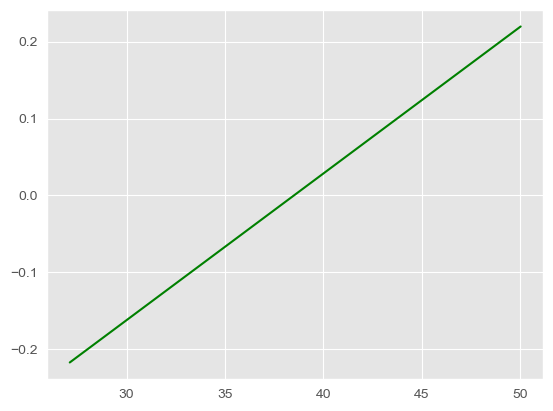

In [860]:
plt.plot(polyline, model1(polyline), color='green')

In [861]:
df.to_csv(data_path + 'mobility_heat/mobility_heat_w_vars_residential_v5.csv')



## Set up Workplaces

In [1023]:
mob_vars = pd.read_csv(data_path + 'mobility_heat/mobility_heat_w_vars_v10.csv')


In [1024]:
mob_vars['workplaces_sign'] = [1 if x>0 else 0 for x in mob_vars['workplaces_difference']]

In [1025]:
df = mob_vars.dropna(subset='workplaces_difference')
df['remove'] = [True if abs(x) >= df['workplaces_difference'].mean() + (2 * df['workplaces_difference'].std()) else False for x in df['workplaces_difference'] ]
df = df[df['remove'] == False]

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_67894/2694948548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['remove'] = [True if abs(x) >= df['workplaces_difference'].mean() + (2 * df['workplaces_difference'].std()) else False for x in df['workplaces_difference'] ]


In [1026]:
df['heat_temp_centered'] = df['temperature_2m_heat'] - df['temperature_2m_heat'].mean()
#df['temp_diff_'] = df['temp_diff'] - df['temp_diff'].mean()

In [1027]:
df['large_city'] = [x if x in ['Los Angeles County', 'San Diego County', 'Santa Clara County', 'San Francisco County', 'Sacramento County', 'King County', 'Multnomah County', 'Greater Vancouver'] else 'nonmajor' for x  in df['county']]

In [1028]:
df.columns

Index(['Unnamed: 0.8', 'Unnamed: 0.7', 'Unnamed: 0.6', 'Unnamed: 0.5',
       'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'index', 'Unnamed: 0.1',
       'Unnamed: 0', 'country_region_code', 'country_region', 'state',
       'county', 'metro_area', 'iso_3166_2_code', 'census_fips_code',
       'place_id', 'date_heat', 'retail_heat', 'grocery_pharmacy_heat',
       'parks_heat', 'transit_heat', 'workplaces_heat', 'residential_heat',
       'year', 'location', 'geometry', 'control_day', 'temperature_2m_heat',
       'date_control', 'retail_control', 'grocery_pharmacy_control',
       'parks_control', 'transit_control', 'workplaces_control',
       'residential_control', 'retail_difference',
       'grocery_pharmacy_difference', 'parks_difference', 'transit_difference',
       'workplaces_difference', 'residential_difference', 'day_of_week',
       'weekend', 'datetime_x', 'temperature_2m_control', 'temp_diff',
       'heat_ID', 'date', 'Heat Wave Duration', 'dur_ranking', 'stage',
  

<AxesSubplot:xlabel='income_dec', ylabel='parks_difference'>

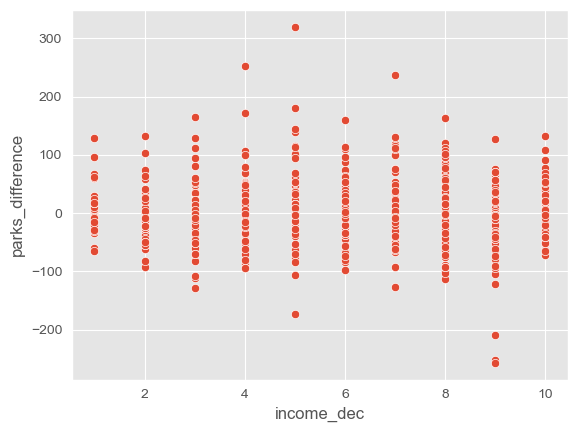

In [1029]:
sns.scatterplot(data=df, x='income_dec', y='parks_difference')

In [1030]:
df.to_csv(data_path + 'mobility_heat/mobility_heat_w_vars_workplaces_v4.csv')

## Set up Transit

In [ ]:
mob_vars = pd.read_csv(data_path + 'mobility_heat/mobility_heat_w_vars_v10.csv')

In [ ]:
mob_vars['transit_sign'] = [1 if x>0 else 0 for x in mob_vars['transit_difference']]

In [ ]:
df = mob_vars.dropna(subset='transit_difference')
df['remove'] = [True if abs(x) >= df['transit_difference'].mean() + (2 * df['transit_difference'].std()) else False for x in df['transit_difference'] ]
df = df[df['remove'] == False]

In [ ]:
df['heat_temp_centered'] = df['temperature_2m_heat'] - df['temperature_2m_heat'].mean()
#df['temp_diff_'] = df['temp_diff'] - df['temp_diff'].mean()

In [ ]:
df['large_city'] = [x if x in ['Los Angeles County', 'San Diego County', 'Santa Clara County', 'San Francisco County', 'Sacramento County', 'King County', 'Multnomah County', 'Greater Vancouver'] else 'nonmajor' for x  in df['county']]

In [ ]:
model1 = np.poly1d(np.polyfit(x=df['temperature_2m_heat'], y=df['transit_difference'], deg=2))

In [ ]:
polyline = np.linspace(df['temperature_2m_heat'].min(), df['temperature_2m_heat'].max(), len(df['temperature_2m_heat']))

In [ ]:
plt.plot(polyline, model1(polyline), color='green')

In [ ]:
sns.lmplot(data=df, x='heat_temp_centered', y='transit_difference', col='year')

In [ ]:
df.to_csv(data_path + 'mobility_heat/mobility_heat_w_vars_transit_v5.csv')

In [ ]:
df = df.replace('California', 'A_California')

In [ ]:
df.groupby('state')['temperature_2m_heat'].count()

In [ ]:
mod_fixed = smf.ols(formula='workplaces_difference ~ heat_temp_centered*state + temp_diff+ year + coast_binary', data = df)
res_fixed = mod_fixed.fit()
print(res_fixed.summary())

In [31]:
In [1]: import statsmodels.api as sm

In [2]: import statsmodels.formula.api as smf

In [ ]:
mod_fixed = smf.ols(formula='workplaces_difference ~ heat_temp_centered*state + temp_diff+ year + coast_binary', data = df)



## Set up multivariate


In [22]:
mob_vars = pd.read_csv(data_path + 'mobility_heat/mobility_heat_w_vars_v10.csv')

In [23]:
mob_vars.groupby('state')['temperature_2m_heat'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
British Columbia,1052.0,33.086974,3.256968,25.090082,30.712553,32.947633,34.713197,44.067896
California,2300.0,41.505676,3.746925,27.253336,39.142004,41.802171,43.905378,51.490472
Oregon,1425.0,37.337980,2.957773,25.272424,35.538034,37.047693,39.088663,48.115305
Washington,1519.0,37.030001,4.588687,21.027460,33.739786,37.220377,40.477861,48.115305


In [24]:
mob_vars['temperature_2m_heat'].mean()

38.075880638616994

In [25]:
df = mob_vars.copy()

In [26]:
df['workplaces_difference'] = [np.nan if abs(x) >= df['workplaces_difference'].mean() + (2 * df['workplaces_difference'].std()) else x for x in df['workplaces_difference'] ]

df['residential_difference'] = [np.nan if abs(x) >= df['residential_difference'].mean() + (2 * df['residential_difference'].std()) else x for x in df['residential_difference'] ]

df['grocery_pharmacy_difference'] = [np.nan if abs(x) >= df['grocery_pharmacy_difference'].mean() + (2 * df['grocery_pharmacy_difference'].std()) else x for x in df['grocery_pharmacy_difference'] ]

df['parks_difference'] = [np.nan if abs(x)>= df['parks_difference'].mean() + (2 * df['parks_difference'].std()) else x for x in df['parks_difference'] ]

df['retail_difference'] = [np.nan if abs(x) >= df['retail_difference'].mean() + (2 * df['retail_difference'].std()) else x for x in df['retail_difference'] ]

df['transit_difference'] = [np.nan if abs(x) >= df['transit_difference'].mean() + (2 * df['transit_difference'].std()) else x for x in df['transit_difference'] ]

df.dropna(subset=['workplaces_difference', 'residential_difference', 'grocery_pharmacy_difference', 'parks_difference', 'retail_difference'], inplace=True)

In [27]:
df['heat_temp_centered'] = df['temperature_2m_heat'] - df['temperature_2m_heat'].mean()
df['temp_diff'] = df['temp_diff'] - df['temp_diff'].mean()

In [28]:
df['large_city'] = [x if x in ['Los Angeles County', 'San Diego County', 'Santa Clara County', 'San Francisco County', 'Sacramento County', 'King County', 'Multnomah County', 'Greater Vancouver'] else 'nonmajor' for x  in df['county']]

In [29]:
df['date'] = pd.to_datetime(df['date'])

In [30]:
df['month'] = [x.month for x in df['date']]

In [32]:
df = df[['temperature_2m_heat', 'month', 'large_city', 'date', 'location', 'heat_ID', 'workplaces_difference', 'residential_difference', 'grocery_pharmacy_difference', 'retail_difference', 'parks_difference', 'transit_difference', 'state', 'year', 'weekend', 'stage_frac', 'heatwave_dur', 'temp_diff', 'heat_temp_centered', 'coast_binary', 'temperature_2m_winter', 'income_dec', 'over65_dec', 'large_city']]

In [33]:
df['coast_binary'] = df['coast_binary'] * 1

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_10161/4123053179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['coast_binary'] = df['coast_binary'] * 1


In [34]:
df['index'] = range(0, len(df))

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_10161/1307996848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['index'] = range(0, len(df))


In [35]:
df['june_hw'] = df.groupby(['heat_ID'])['month'].transform(lambda x: 6 in x.unique())

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_10161/796695230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['june_hw'] = df.groupby(['heat_ID'])['month'].transform(lambda x: 6 in x.unique())


In [36]:
len(df.heat_ID.unique())

782

In [37]:
df.drop_duplicates(['heat_ID', 'june_hw'])['june_hw'].value_counts()

False    639
True     143
Name: june_hw, dtype: int64

In [38]:
#get earliest heat wave day of each county
early_hw = df.groupby(['year', 'location'])['date'].apply(lambda x: x.min()).reset_index()
df = df.merge(early_hw, on=['year', 'location'])

In [39]:
df['annual_min'] = df['date_x'] == df['date_y']

In [40]:
df['first_annual_hw'] = df.groupby('heat_ID')['annual_min'].transform(lambda x: True in x.unique())

In [41]:
df.drop_duplicates(['heat_ID', 'first_annual_hw'])['first_annual_hw'].value_counts()

False    542
True     240
Name: first_annual_hw, dtype: int64

In [42]:
len(df['location'].unique()) * 3

258

In [43]:
df['june_hw'] = df['june_hw'] * 1
df['first_annual_hw'] = df['first_annual_hw'] * 1

In [44]:
df['BC_temp'] = [x if y == 'British Columbia' else np.nan for x, y in zip(df['temperature_2m_heat'], df['state'])]
df['WA_temp'] = [x if y == 'Washington' else np.nan for x, y in zip(df['temperature_2m_heat'], df['state'])]
df['OR_temp'] = [x if y == 'Oregon' else np.nan for x, y in zip(df['temperature_2m_heat'], df['state'])]
df['CA_temp'] = [x if y == 'California' else np.nan for x, y in zip(df['temperature_2m_heat'], df['state'])]

In [45]:
df.groupby(['first_annual_hw'])['month'].describe()

,count,mean,std,min,25%,50%,75%,max
first_annual_hw,,,,,,,,
0,1715.0,7.907289,0.802657,6.0,7.0,8.0,8.0,9.0
1,782.0,6.698210,0.782963,6.0,6.0,7.0,7.0,9.0


In [949]:
df.to_csv(data_path + 'mobility_heat/multivariate_modelling_v28.csv')

In [815]:
sns.lmplot(df, x='temperature_2m_heat', y='residential_difference', hue='state', alpha=0.2)

TypeError: lmplot() got an unexpected keyword argument 'alpha'

In [816]:
df  = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/results/residuals_v1.csv')

In [817]:
df['state'] = [x.split(',')[-1].strip() for x in df['residualsID']]

<AxesSubplot:xlabel='state', ylabel='parks_resid'>

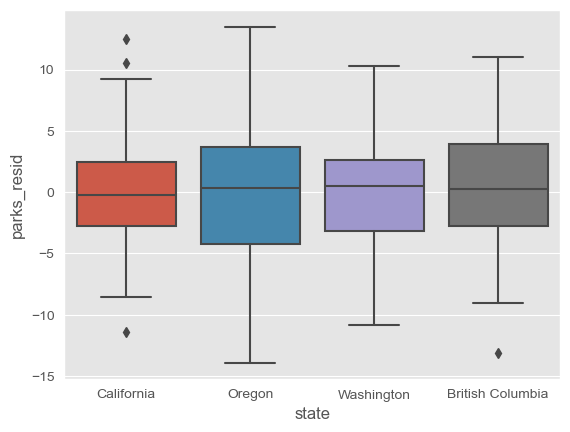

In [818]:
sns.boxplot(df, x='state', y='parks_resid')